In [1]:
# Importing nad loading the required libraries :


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# Loading the .csv dataset file :

# This dataset includes nutritional information for starbucks drink menu items :

starbucks_menu=pd.read_csv('/home/shrihari/anaconda3/OG/datasets/starbuck/starbucks_drinkMenu_expanded.csv')
starbucks_menu.head()

,Beverage_category,Beverage,Beverage_prep,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [79]:
starbucks_menu.shape

(242, 18)

In [4]:
# Chaning the column name to simple form  and to lower case


starbucks_menu.columns=starbucks_menu.columns.str.replace(")","")
starbucks_menu.columns=starbucks_menu.columns.str.replace(" ","")
starbucks_menu.columns=starbucks_menu.columns.str.replace("(","_")
starbucks_menu.columns=starbucks_menu.columns.str.lower()
starbucks_menu.head()

,beverage_category,beverage,beverage_prep,calories,totalfat_g,transfat_g,saturatedfat_g,sodium_mg,totalcarbohydrates_g,cholesterol_mg,dietaryfibre_g,sugars_g,protein_g,vitamina_%dv,vitaminc_%dv,calcium_%dv,iron_%dv,caffeine_mg
0,Coffee,Brewed Coffee,Short,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [5]:
# Chaecking the data types of each columns :

starbucks_menu.dtypes


beverage_category        object
beverage                 object
beverage_prep            object
calories                  int64
totalfat_g               object
transfat_g              float64
saturatedfat_g          float64
sodium_mg                 int64
totalcarbohydrates_g      int64
cholesterol_mg            int64
dietaryfibre_g            int64
sugars_g                  int64
protein_g               float64
vitamina_%dv             object
vitaminc_%dv             object
calcium_%dv              object
iron_%dv                 object
caffeine_mg              object
dtype: object

In [6]:
# converting from object to float :


#starbucks_menu['totalfat_g']=starbucks_menu['totalfat_g'].astype(float,errors='ignore')
#starbucks_menu['caffeine_mg']=starbucks_menu['caffeine_mg'].astype(float,errors='ignore')

starbucks_menu['totalfat_g']=pd.to_numeric(starbucks_menu['totalfat_g'],errors='coerce')
starbucks_menu['caffeine_mg']=pd.to_numeric(starbucks_menu['caffeine_mg'],errors='coerce')

In [7]:
starbucks_menu.dtypes

beverage_category        object
beverage                 object
beverage_prep            object
calories                  int64
totalfat_g              float64
transfat_g              float64
saturatedfat_g          float64
sodium_mg                 int64
totalcarbohydrates_g      int64
cholesterol_mg            int64
dietaryfibre_g            int64
sugars_g                  int64
protein_g               float64
vitamina_%dv             object
vitaminc_%dv             object
calcium_%dv              object
iron_%dv                 object
caffeine_mg             float64
dtype: object

In [23]:
# Five point summary of dataset

starbucks_menu.describe()

,calories,totalfat_g,transfat_g,saturatedfat_g,sodium_mg,totalcarbohydrates_g,cholesterol_mg,dietaryfibre_g,sugars_g,protein_g,caffeine_mg
count,242.000000,241.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,219.000000
mean,193.871901,2.903734,1.307025,0.037603,6.363636,128.884298,35.991736,0.805785,32.962810,6.978512,89.520548
std,102.863303,2.950443,1.640259,0.071377,8.630257,82.303223,20.795186,1.445944,19.730199,4.871659,64.726831
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,120.000000,0.200000,0.100000,0.000000,0.000000,70.000000,21.000000,0.000000,18.000000,3.000000,50.000000
50%,185.000000,2.500000,0.500000,0.000000,5.000000,125.000000,34.000000,0.000000,32.000000,6.000000,75.000000
75%,260.000000,4.500000,2.000000,0.100000,10.000000,170.000000,50.750000,1.000000,43.750000,10.000000,142.500000
max,510.000000,15.000000,9.000000,0.300000,40.000000,340.000000,90.000000,8.000000,84.000000,20.000000,410.000000


In [8]:
# Checking for null values/missing values :

starbucks_menu.isna().sum()

beverage_category        0
beverage                 0
beverage_prep            0
calories                 0
totalfat_g               1
transfat_g               0
saturatedfat_g           0
sodium_mg                0
totalcarbohydrates_g     0
cholesterol_mg           0
dietaryfibre_g           0
sugars_g                 0
protein_g                0
vitamina_%dv             0
vitaminc_%dv             0
calcium_%dv              0
iron_%dv                 0
caffeine_mg             23
dtype: int64

In [9]:
# We can see 'totalfat_g' contains 1 missing values and 'caffeine_mg' contains 23 missing values.


In [10]:
starbucks_menu[starbucks_menu['caffeine_mg'].isnull()]

,beverage_category,beverage,beverage_prep,calories,totalfat_g,transfat_g,saturatedfat_g,sodium_mg,totalcarbohydrates_g,cholesterol_mg,dietaryfibre_g,sugars_g,protein_g,vitamina_%dv,vitaminc_%dv,calcium_%dv,iron_%dv,caffeine_mg
102,Tazo® Tea Drinks,Tazo® Tea,Short,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,NaN
103,Tazo® Tea Drinks,Tazo® Tea,Tall,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,NaN
104,Tazo® Tea Drinks,Tazo® Tea,Grande,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,NaN
105,Tazo® Tea Drinks,Tazo® Tea,Venti,0,0.0,0.0,0.0,0,0,0,0,0,0.0,0%,0%,0%,0%,NaN
130,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Short Nonfat Milk,80,0.1,0.1,0.0,0,45,16,0,16,4.0,6%,0%,10%,0.00%,NaN
131,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,90,2.0,1.0,0.1,10,50,15,0,15,3.0,6%,0%,10%,0.00%,NaN
132,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,80,1.5,0.2,0.0,0,40,14,0,13,3.0,4%,0%,10%,6.00%,NaN
133,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Tall Nonfat Milk,120,0.1,0.1,0.0,5,65,23,0,23,5.0,10%,0%,20%,0.00%,NaN
134,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,2% Milk,140,3.0,1.5,0.1,15,75,23,0,23,5.0,8%,0%,15%,0.00%,NaN
135,Tazo® Tea Drinks,Tazo® Full-Leaf Tea Latte,Soymilk,130,2.5,0.3,0.0,0,60,21,1,19,4.0,6%,0%,20%,8.00%,NaN


In [11]:
starbucks_menu[starbucks_menu['totalfat_g'].isnull()]

,beverage_category,beverage,beverage_prep,calories,totalfat_g,transfat_g,saturatedfat_g,sodium_mg,totalcarbohydrates_g,cholesterol_mg,dietaryfibre_g,sugars_g,protein_g,vitamina_%dv,vitaminc_%dv,calcium_%dv,iron_%dv,caffeine_mg
237,Frappuccino® Blended Crème,Strawberries & Crème (Without Whipped Cream),Soymilk,320,NaN,0.4,0.0,0,250,67,1,64,5.0,6%,8%,20%,10%,0.0


In [13]:
# since ' caffeine_mg' and 'totalfat_g' are numerical columns we can replace NaN value with mean of the column.

starbucks_menu['caffeine_mg']=starbucks_menu['caffeine_mg'].fillna(starbucks_menu['caffeine_mg'].mean())
starbucks_menu['totalfat_g']=starbucks_menu['totalfat_g'].fillna(starbucks_menu['totalfat_g'].mean())


In [15]:
# Checking of each beverage cartegory name :

l=starbucks_menu.beverage_category.unique()
l

array(['Coffee', 'Classic Espresso Drinks', 'Signature Espresso Drinks',
       'Tazo® Tea Drinks', 'Shaken Iced Beverages', 'Smoothies',
       'Frappuccino® Blended Coffee', 'Frappuccino® Light Blended Coffee',
       'Frappuccino® Blended Crème'], dtype=object)

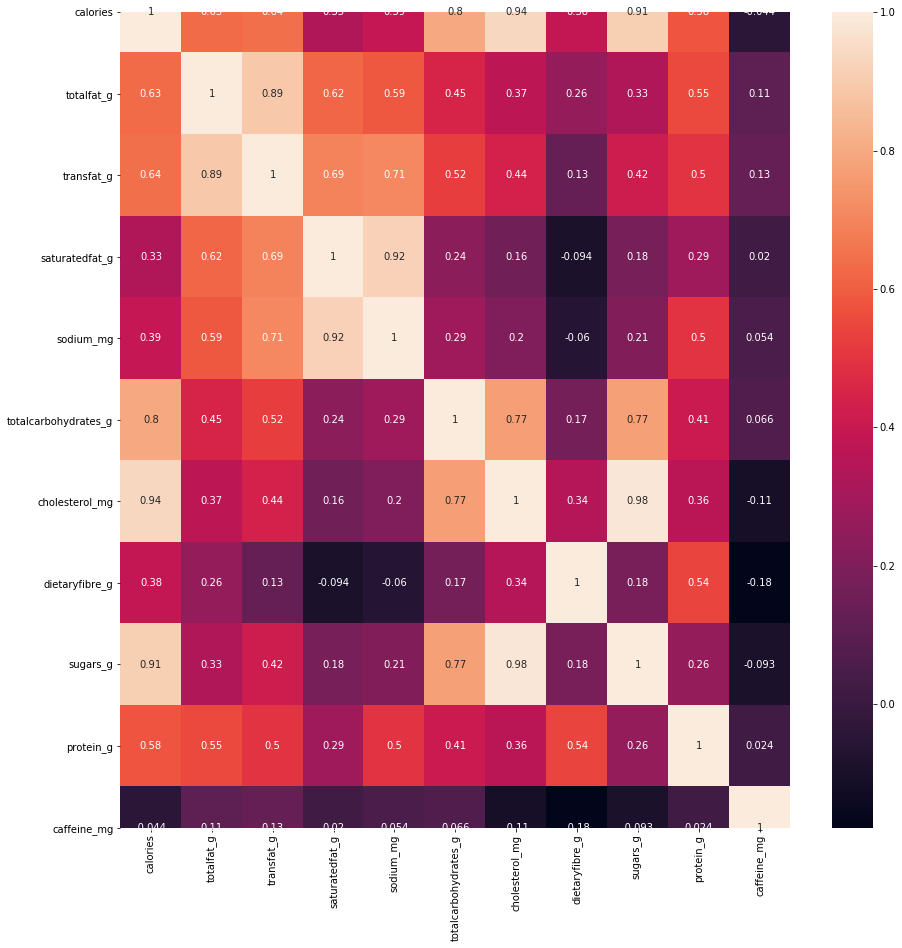

In [16]:
# corelationship between each columns :

plt.figure(figsize=(15,15))
sns.heatmap(starbucks_menu.corr(),annot=True)


In [ ]:
# Observations :

# 1) : calories and cholesterol_mg have strong corelation
# 2) : sugars_g and calories also have strong corelation
# 3) : suagrs_g and cholesterol_mg also have very high strong corelation


beverage_category
Classic Espresso Drinks              7
Coffee                               1
Frappuccino® Blended Coffee          4
Frappuccino® Blended Crème           2
Frappuccino® Light Blended Coffee    4
Shaken Iced Beverages                4
Signature Espresso Drinks            4
Smoothies                            3
Tazo® Tea Drinks                     5
Name: beverage, dtype: int64


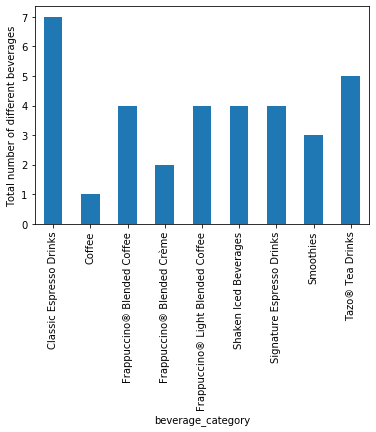

In [17]:
# Total number of beverages in each beverage category :

s=starbucks_menu.groupby('beverage_category')['beverage'].nunique()
print(s)

starbucks_menu.groupby('beverage_category')['beverage'].nunique().plot(kind='bar')
plt.ylabel('Total number of different beverages')
plt.show()

In [18]:
starbucks_menu.groupby('beverage_category')['beverage'].unique()


beverage_category
Classic Espresso Drinks              [Caffè Latte, Caffè Mocha (Without Whipped Cre...
Coffee                                                                 [Brewed Coffee]
Frappuccino® Blended Coffee          [Coffee, Mocha (Without Whipped Cream), Carame...
Frappuccino® Blended Crème           [Strawberries & Crème (Without Whipped Cream),...
Frappuccino® Light Blended Coffee                  [Coffee, Mocha, Caramel, Java Chip]
Shaken Iced Beverages                [Iced Brewed Coffee (With Classic Syrup), Iced...
Signature Espresso Drinks            [Caramel Macchiato, White Chocolate Mocha (Wit...
Smoothies                            [Banana Chocolate Smoothie, Orange Mango Banan...
Tazo® Tea Drinks                     [Tazo® Tea, Tazo® Chai Tea Latte, Tazo® Green ...
Name: beverage, dtype: object

In [61]:
# On an average nutrition containtent each beverage_category

df=starbucks_menu.groupby('beverage_category').mean()
df

,calories,totalfat_g,transfat_g,saturatedfat_g,sodium_mg,totalcarbohydrates_g,cholesterol_mg,dietaryfibre_g,sugars_g,protein_g,caffeine_mg
beverage_category,,,,,,,,,,,
Classic Espresso Drinks,140.172414,3.127586,1.210345,0.046552,8.103448,104.672414,20.327586,0.620690,16.965517,8.686207,122.068966
Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000,293.750000
Frappuccino® Blended Coffee,276.944444,3.002778,1.700000,0.038889,4.444444,230.277778,59.638889,0.777778,57.083333,4.222222,101.805556
Frappuccino® Blended Crème,233.076923,1.931056,0.769231,0.038462,4.230769,188.846154,49.923077,0.307692,48.461538,4.000000,0.000000
Frappuccino® Light Blended Coffee,162.500000,1.258333,0.900000,0.000000,1.666667,217.500000,34.500000,0.666667,32.416667,4.250000,99.583333
Shaken Iced Beverages,114.444444,0.472222,0.138889,0.005556,1.111111,18.277778,26.166667,0.000000,26.000000,1.344444,122.895738
Signature Espresso Drinks,250.000000,5.275000,2.712500,0.050000,9.625000,138.250000,42.775000,0.775000,38.600000,9.875000,73.875000
Smoothies,282.222222,2.333333,0.933333,0.011111,6.111111,132.777778,54.555556,6.777778,36.777778,17.111111,14.946728
Tazo® Tea Drinks,177.307692,2.540385,0.859615,0.044231,7.211538,89.903846,31.692308,0.519231,30.307692,6.807692,62.448630


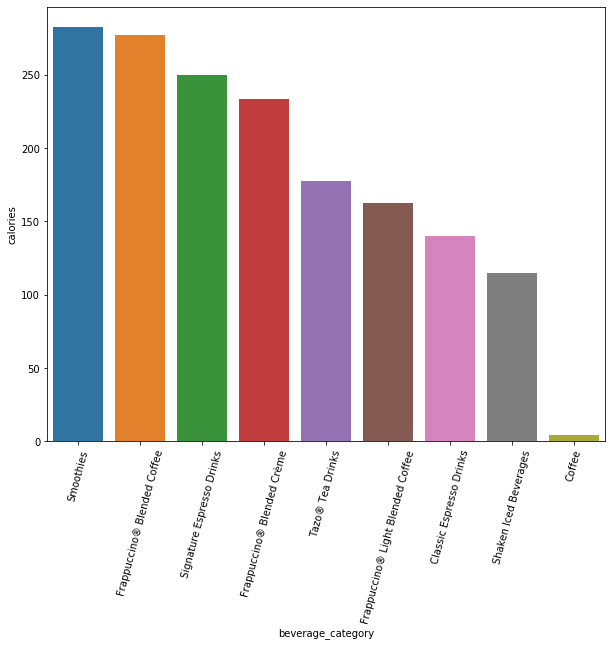

In [62]:
# grahical represantation of calories in each beverage category 

plt.figure(figsize=(10,8))

sns.barplot(x=df.index,y='calories',data=df,order=df.sort_values('calories',ascending=False).index)
plt.xticks(rotation=75)
plt.show()

In [ ]:
# Obervation :

# we can see beverage category of type 'Smoothies' have higest calories and category 'Coffee' has least calories in it

In [64]:
#  Average calories in each beverage  

df1=starbucks_menu.groupby('beverage').mean()
df1

,calories,totalfat_g,transfat_g,saturatedfat_g,sodium_mg,totalcarbohydrates_g,cholesterol_mg,dietaryfibre_g,sugars_g,protein_g,caffeine_mg
beverage,,,,,,,,,,,
Banana Chocolate Smoothie,290.000000,4.000000,1.833333,0.033333,8.333333,153.333333,52.333333,7.000000,33.000000,19.666667,39.840183
Brewed Coffee,4.250000,0.100000,0.000000,0.000000,0.000000,8.750000,0.000000,0.000000,0.000000,0.700000,293.750000
Caffè Americano,13.750000,0.000000,0.000000,0.000000,0.000000,11.250000,2.500000,0.000000,0.000000,0.850000,187.500000
Caffè Latte,139.166667,3.791667,1.350000,0.066667,10.833333,134.583333,15.166667,0.416667,12.916667,10.416667,112.500000
Caffè Mocha (Without Whipped Cream),210.000000,5.208333,2.375000,0.050000,9.166667,111.250000,35.750000,1.916667,27.833333,11.083333,133.750000
Cappuccino,90.000000,2.466667,0.833333,0.041667,7.083333,85.000000,10.083333,0.250000,8.083333,6.833333,112.500000
Caramel,150.000000,0.100000,0.066667,0.000000,1.666667,203.333333,33.333333,0.000000,32.666667,3.666667,91.666667
Caramel (Without Whipped Cream),268.888889,1.866667,0.822222,0.033333,4.444444,223.333333,59.222222,0.111111,58.000000,3.666667,100.000000
Caramel Apple Spice (Without Whipped Cream),247.500000,0.000000,0.000000,0.000000,0.000000,17.500000,61.750000,0.000000,57.500000,0.000000,0.000000


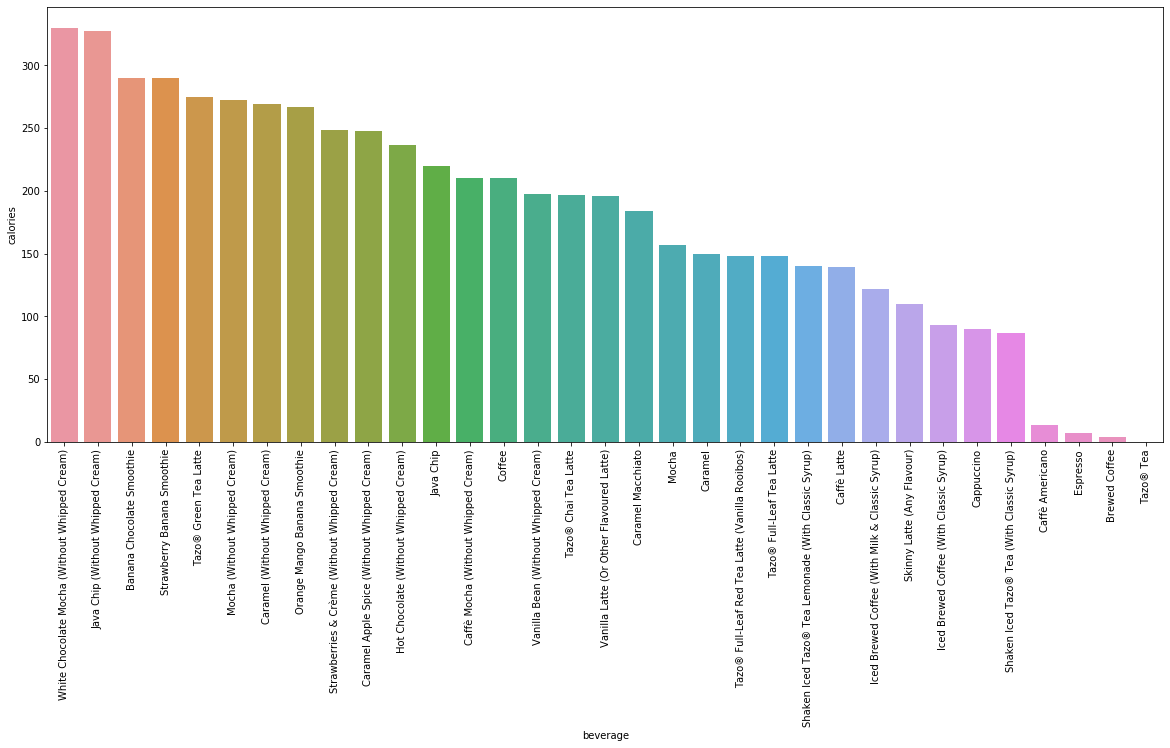

In [65]:
 # grahical represantation of beverage type v/s calories

plt.figure(figsize=(20,8))

sns.barplot(x=df1.index,y='calories',data=df1,order=df1.sort_values('calories',ascending=False).index)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Observations :
# we can see that beverage which does not contain whipped Cream and contains smoothie have more calories init.

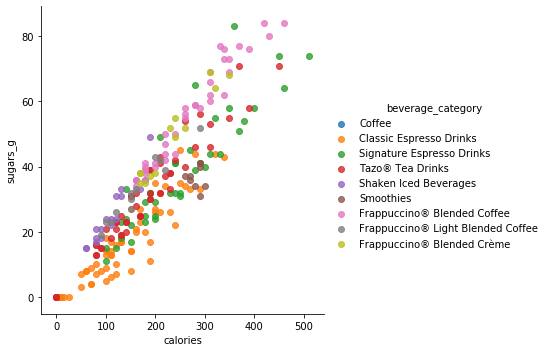

In [23]:
# relationship between calories v/s sugar

sns.lmplot(data=starbucks_menu,x='calories',y='sugars_g',fit_reg=False,hue='beverage_category')

In [341]:
# Obsevation :

# 1). as sugar level increases the calories also increases
# and also we saw same high corelation b/w calories and sugar level in heatmap above

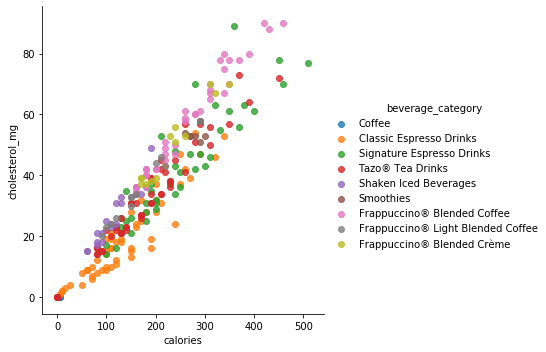

In [90]:
# cholesterol v/s calories  in all  beverage category :

sns.lmplot(data=starbucks_menu,x='calories',y='cholesterol_mg',fit_reg=False,hue='beverage_category')

In [ ]:
# Obsevation :

# 1). as calories level increases the cholesterol also increases
# and also we saw same high corelation b/w calories and  cholesterol level in heatmap above

In [91]:
calories_lite=starbucks_menu[starbucks_menu['beverage_category']=='Frappuccino® Light Blended Coffee']
calories_regular=starbucks_menu[starbucks_menu['beverage_category']=='Frappuccino® Light Coffee']

In [94]:
stats.ttest_ind(calories_lite.calories,calories_regular.calories)

Ttest_indResult(statistic=nan, pvalue=nan)

In [459]:
starbucks_menu.columns

Index(['beverage_category', 'beverage', 'beverage_prep', 'calories',
       'totalfat_g', 'transfat_g', 'saturatedfat_g', 'sodium_mg',
       'totalcarbohydrates_g', 'cholesterol_mg', 'dietaryfibre_g', 'sugars_g',
       'protein_g', 'vitamina_%dv', 'vitaminc_%dv', 'calcium_%dv', 'iron_%dv',
       'caffeine_mg'],
      dtype='object')

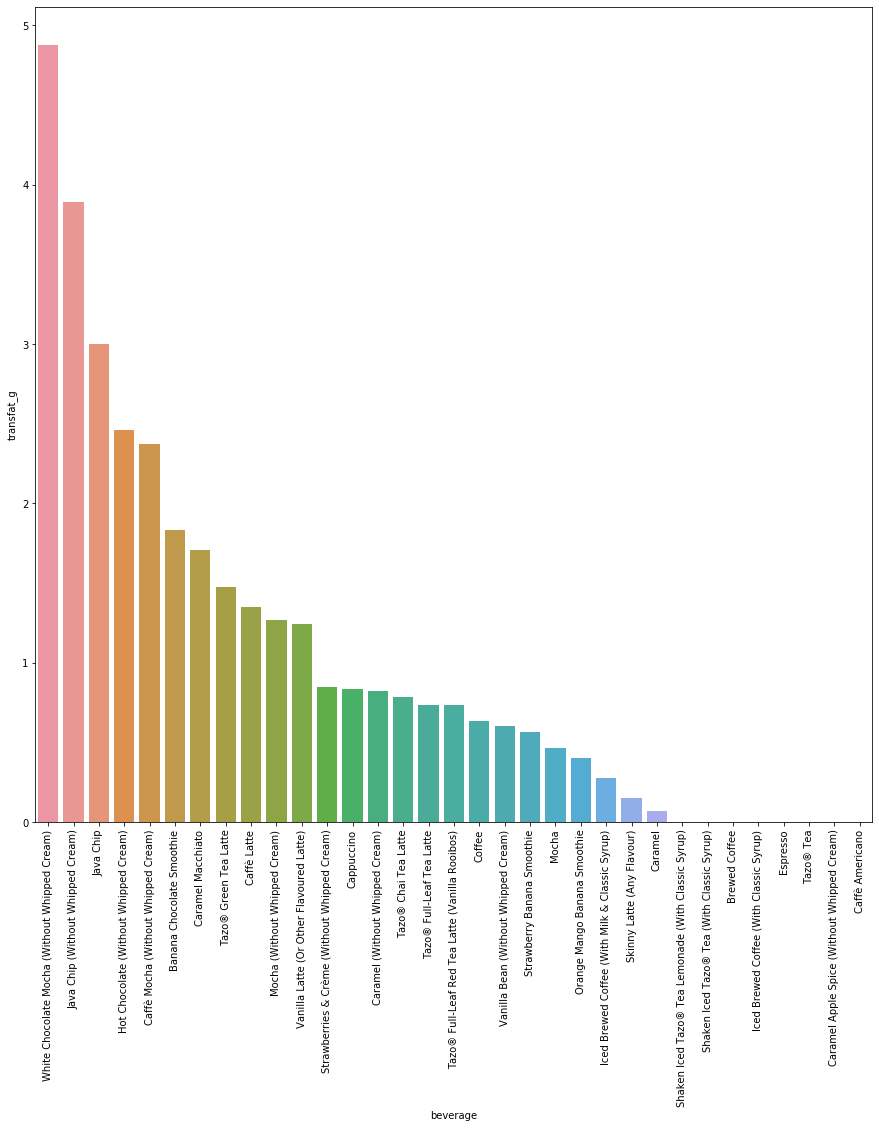

In [68]:
# beverage type v/s transfat_g

plt.figure(figsize=(15,15))
sns.barplot(df1.index,df1['transfat_g'],order=df1.sort_values('transfat_g',ascending=False).index)
plt.xticks(rotation=90)
plt.show()

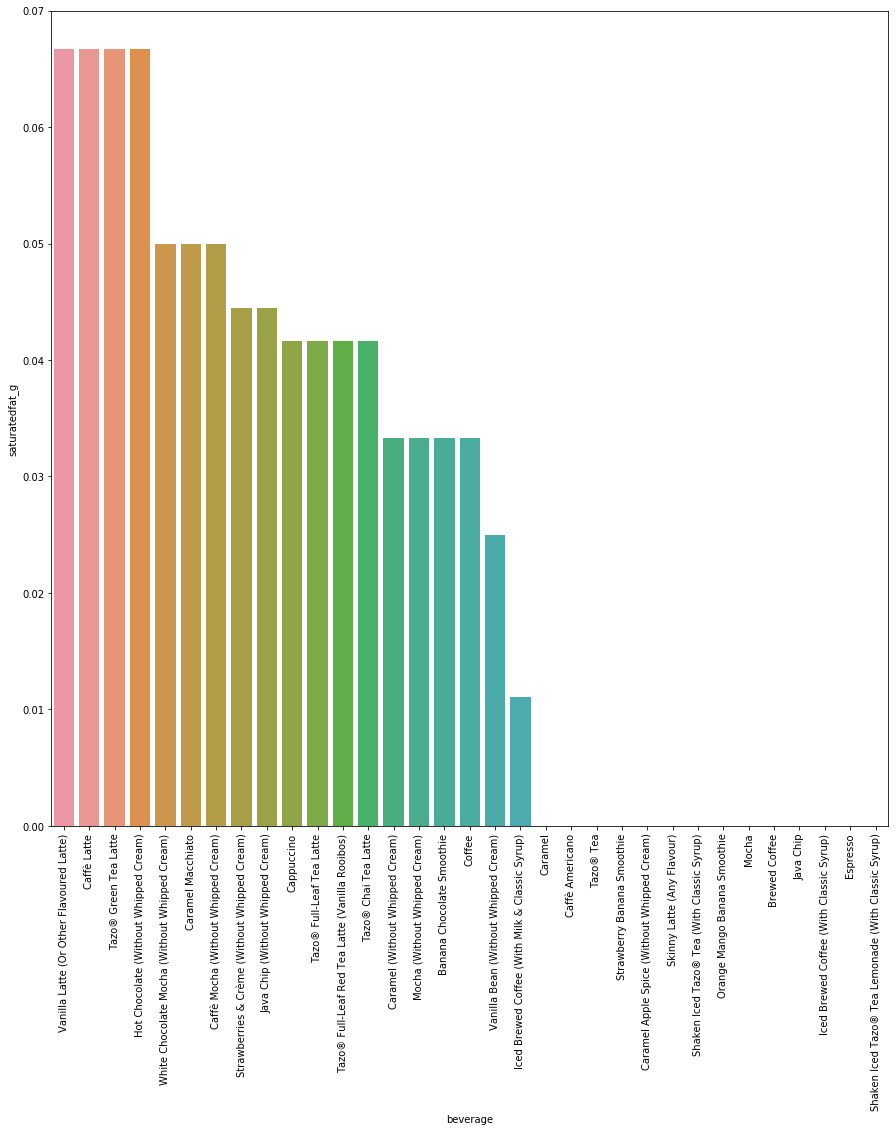

In [67]:
# beverage type v/s saturatedfat_g

plt.figure(figsize=(15,15))
sns.barplot(x=df1.index,y=df1['saturatedfat_g'],order=df1.sort_values('saturatedfat_g',ascending=False).index)
plt.xticks(rotation=90)
plt.show()

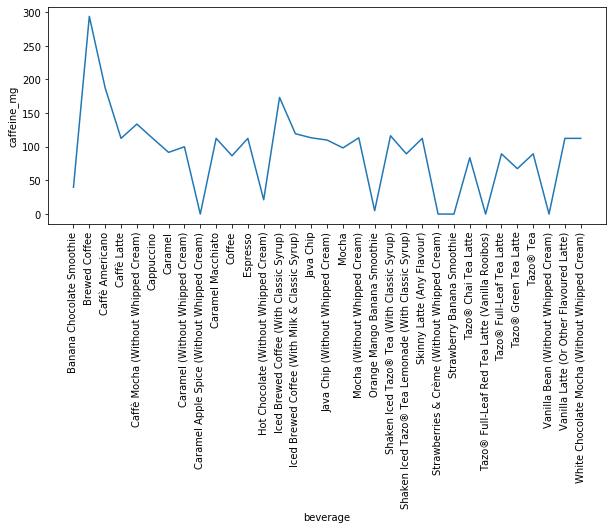

In [75]:
# lets see average caffeine in each beverage :

plt.figure(figsize=(10,4))
sns.lineplot(x=df1.index,y=df1['caffeine_mg'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Observations :
# We can see that caffeine content is more in coffee type beverages and brewed coffee is caffeine rich

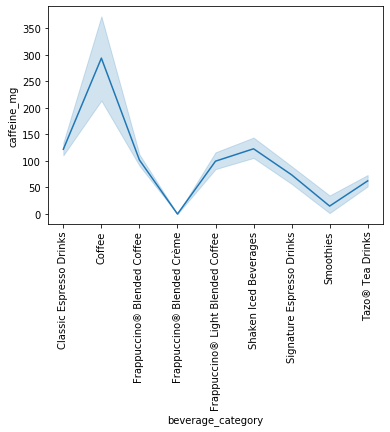

In [105]:
sns.lineplot(x=starbucks_menu['beverage_category'],y=starbucks_menu['caffeine_mg'],data=starbucks_menu)
plt.xticks(rotation=90)
plt.show()

In [106]:
# Obervation : 1).Other then the Coffee category rest of them have very less caffeine content in their product.
#              2). And aslo as per the name blended coffee it as less caffeine content.



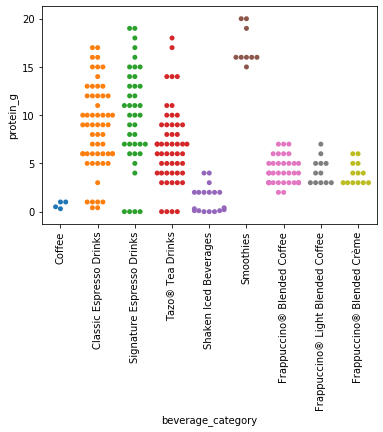

In [114]:
sns.swarmplot(x=starbucks_menu['beverage_category'],y=starbucks_menu['protein_g'])
plt.xticks(rotation=90)
plt.show()

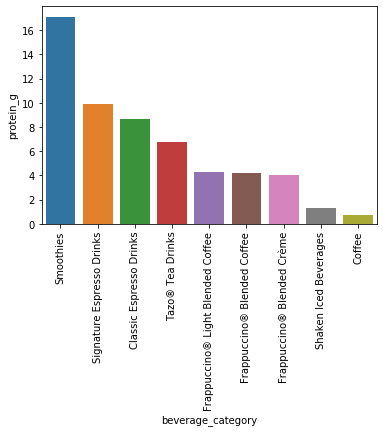

In [72]:
sns.barplot(x=df.index,y=df['protein_g'],order=df.sort_values('protein_g',ascending=False).index)
plt.xticks(rotation=90)
plt.show()

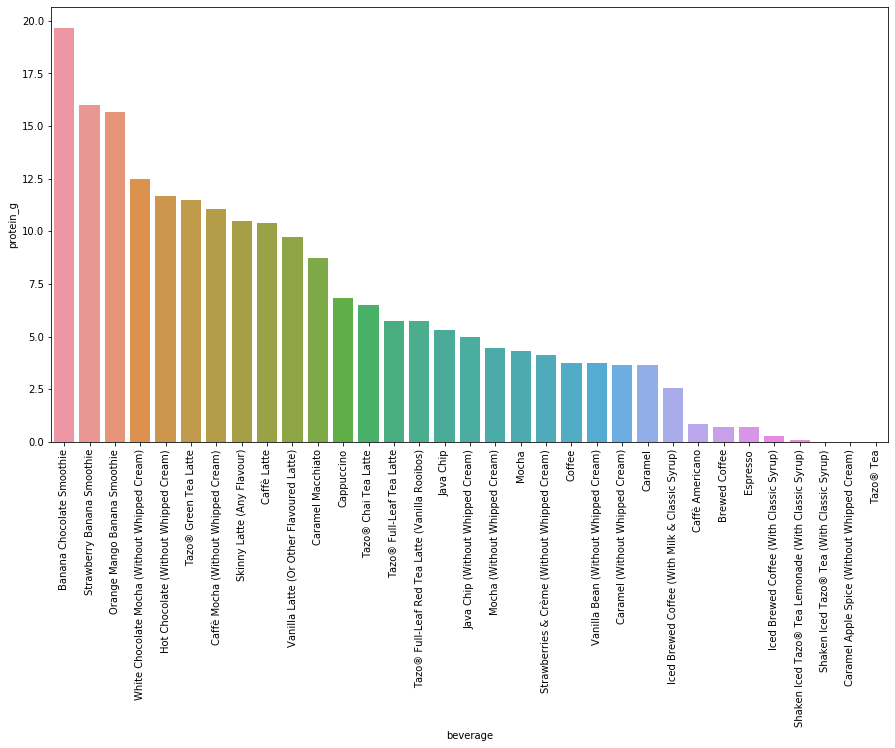

In [78]:
plt.figure(figsize=(15,8))
sns.barplot(x=df1.index,y=df1['protein_g'],order=df1.sort_values('protein_g',ascending=False).index)
plt.xticks(rotation=90)
plt.show()

In [80]:
# From above 3 graphs we can conclude that :

# 1). the smoothies category have more peotein content
# 2). and specilly the beverage which are made of fruites are protien rich.